In [1]:
from glob import glob
from collections import Counter
import re
import os
import pandas as pd
import collections
import numpy as np
import matplotlib.pyplot as plt
#import hunspell
from datetime import datetime
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import wordnet
from tqdm.notebook import tqdm, trange
import time
#from spellchecker import SpellChecker
#%matplotlib inline
#import ipympl
import seaborn as sn
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
dispListLara = pd.read_excel('dispersionLara.xlsx')
dispListSod = pd.read_excel('dispersionSod.xlsx')
dispListSam = pd.read_excel('dispersionSam.xlsx')

ValueError: Excel file format cannot be determined, you must specify an engine manually.

In [20]:
dispListLara = dispListLara.rename(columns={"TotalFreq" : "Frequency"})
dispListSod = dispListSod.rename(columns={"TotalFreq" : "Frequency"})
dispListSam = dispListSam.rename(columns={"DpNorm" : "DPNorm", "Da":"DA","Normed AoA":'Comprehension_AoA', 'Sam AoA':'Measured_Comprehension_AoA'})
Lara_all = dispListLara[["DPNorm", "DA", 'Frequency','Concreteness','Comprehension_AoA','Production_AoA']]
Sod_all = dispListSod[["DPNorm", "DA", 'Frequency','Concreteness','Comprehension_AoA','Production_AoA']]
Sam_all = dispListSam[["DPNorm", "DA", 'Frequency','Concreteness','Comprehension_AoA','Measured_Comprehension_AoA']]
corr_matrix_Lara = Lara_all.corr()
corr_matrix_Sod = Sod_all.corr()
corr_matrix_Sam = Sam_all.corr()

Text(-0.15, 1.05, 'c)')

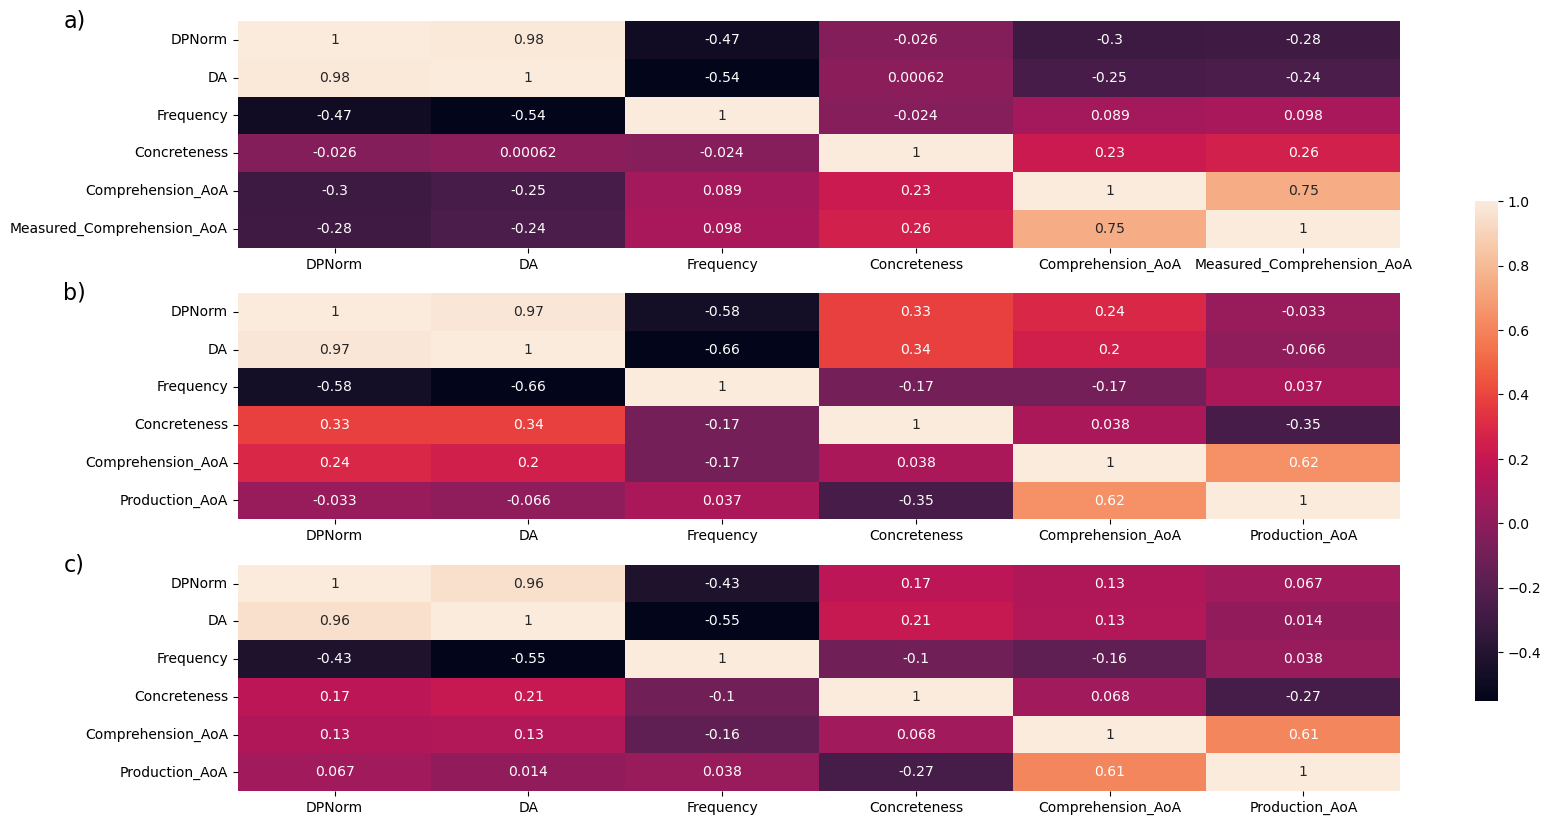

In [32]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 10))
sn.heatmap(corr_matrix_Sam, annot=True, ax=axes[0], cbar=False)
cbar_ax = fig.add_axes([.95, 0.2, 0.015, .5])
axes[0].text(-0.15, 1.05, "a)", transform=axes[0].transAxes, 
             fontsize=16, va="top")
sn.heatmap(corr_matrix_Sod, annot=True, ax=axes[1], cbar_ax=cbar_ax, cbar=False)
axes[1].text(-0.15, 1.05, "b)", transform=axes[1].transAxes, 
             fontsize=16, va="top")
sn.heatmap(corr_matrix_Lara, annot=True, ax=axes[2], cbar_ax=cbar_ax)
axes[2].text(-0.15, 1.05, "c)", transform=axes[2].transAxes, 
             fontsize=16, va="top")